In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solvers
import equations_gallery

%matplotlib inline

Linear FAS solver by default consists of

1) pre smoother: alternating zebra Gauss-Seidel

2) post smoother: the same

3) number of pre smoothing steps is one

4) number of the post smoothing step is one

5) coarse solver is iterative and coincides with the smoother alternating zebra Gauss-Seidel

6) coarsest grid contains $25$ points including boundary

7) linear restriction

8) linear interpolation

see ``class FAS_solver`` for more details.

In [2]:
lFAS = solvers.FAS_solver('linear', verbose = True)

One of the default equations created for tests.

In [3]:
q22 = equations_gallery.get_quasilinear(2, 2)

In [4]:
solution = lFAS.solve(q22, J=5)

Tolerance is 0.00098
Iteration 0
          Defect 1 = 6.4e+04, Defect 2 = 2.1e+05
Iteration 1
          Defect 1 = 3.8e+02, Defect 2 = 7e+02
Iteration 2
          Defect 1 = 9.5, Defect 2 = 1.6e+01
Iteration 3
          Defect 1 = 0.31, Defect 2 = 0.45
Iteration 4
          Defect 1 = 0.011, Defect 2 = 0.015
Iteration 5
          Defect 1 = 0.00036, Defect 2 = 0.00053


The exact solution is known so it is possible to compute an error

In [5]:
q22.errors(solution)

array([  4.59439458e-06,   1.08833775e-04])

---

Nonlinear FAS solver

In [6]:
FAS = solvers.FAS_solver('nonlinear', verbose = True)

Harmonic equation. Linearization is performed by taking contravariant metric coefficients from the previous step.

In [7]:
harmonic = equations_gallery.get_harmonic('Frozen Metrics')

Boundary conditions should be specified in the special format

In [8]:
def triangle_bc(current):
    u, v = current
    N, M = u.shape
    z = np.linspace(0, 1, N)
    x, y = np.meshgrid(z, z, indexing='ij')
    eps1 = 0.1
    eps2 = 0.1
    ###
    u[:, 0] = x[:, 0]
    u[:, -1] = 0.5*z
    u[0, :] = x[0, :]
    u[-1, :] = 1 - 0.5*z
    ###
    v[:, -1] = 1 - 0.5*z
    v[:, 0] = y[:, 0]
    v[0, :] = y[0, :]
    v[-1, :] = 0.5*z
    ###
    return np.array([u, v])

In [9]:
harmonic.bc = triangle_bc

In [10]:
solution = FAS.solve(harmonic, 4)

Tolerance is 0.0039
Iteration 0
          Defect 1 = 6.2e+03, Defect 2 = 6.2e+03
Iteration 1
          Defect 1 = 1.8e+01, Defect 2 = 1.8e+01
Iteration 2
          Defect 1 = 0.28, Defect 2 = 0.28
Iteration 3
          Defect 1 = 0.026, Defect 2 = 0.026
Iteration 4
          Defect 1 = 0.0037, Defect 2 = 0.0037


Visualization of generated mesh.

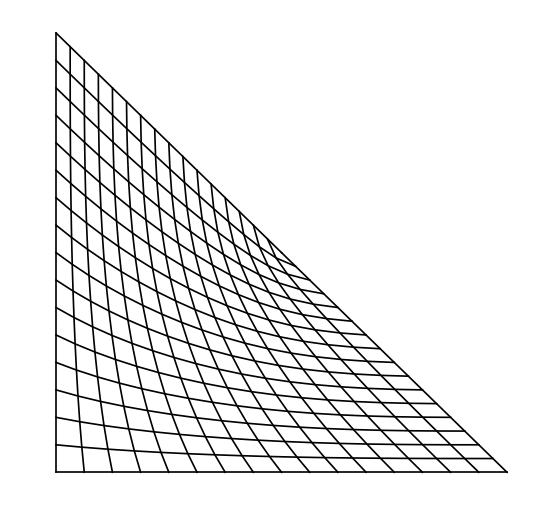

In [11]:
plt.figure(num=None, figsize=(8, 8), dpi=80)
plt.plot(solution[0], solution[1], color='black')
plt.plot(solution[0].T, solution[1].T, color='black')
dummy = plt.axis('off')